In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats

In [ ]:
df = pd.read_csv('Telco_Customer_Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Each row is a customer, and each column contains their attributes.

**customerID**: Customrs' ID, nominal

**gender**: If customers are female or male, (Female, Male).

**SeniorCitizen**: Whether a customer is a senior citizen or not, (1, 0).

**Partner**: Whether the customer has a partner or not, (Yes, No).

**Dependents**: Whether the customer has dependents or not, (Yes, No).

**tenure**: Number of months the customer has stayed with the company, ratio.

**PhoneService**: Whether the customer has a phone service or not, (Yes, No).

**MultipleLines**: Whether the customer has multiple lines or not, (Yes, No, No phone service).

**InternetSerivce**: Customer's internet service provider(DSL, Fiber optic, No).

**OnlineSecurity**: Whether the customer has online scurity or not, (Yes, No).

**DeviceProtection**: Whether the customer has a device protection or not, (Yes, No).

**TechSupport**: Whether the customer has tech support or not, (Yes, No).

**StreamingTV**: Whether the customer has Streaming tv, (Yes, No).

**StreamingMovies**: Whether the customer has streaming movies, (Yes, No).

**Contract**: Type of the customer's contract, (Month-to-month, One year, Two year).

**PaperlessBilling**: If the customer's billing is paperless or not, (Yes, No).

**PaymentMethod**: Customer's payment method, (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges**: How much is the customer's monthly charge, ratio.

**TotalCharges**: Total charges of a customer, ratio.

**Churn**: Whether they left the company or not, (Yes, No).


**The data set includes information about**:

**Customers who left within the last month** – the column is called Churn and is our **target variable**.

**Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

**Demographic info about customers** – gender, age range, and if they have partners and dependents

In [ ]:
#tenure, MonthlyCharges, and TotalCharges are the only numeric variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#converting TotalCharges variabl from object to floating point.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#converting SeniorCitizn values from 0,1 to nominal value of Yes, No
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1: 'Yes'})

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#check the missing values of total charges variable
df[df['TotalCharges'].isnull()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#it seems all tenure of 0 variables have totalcgarges of NaN, it make sense they have no totalcharges, therfore, we can eliminate the 11 rows.
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7032, 21)

In [ ]:
#the duplicated data entries
df.duplicated().sum()

0

**Numerical data**
evaluating the distribution and descriptive characteristics of numerical variables.

In [ ]:
#extracting numerical variables for further analysis
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_numeric.describe().T
#as the numerical variables have no missing values, their statistics value seem to be normal and have no anomaly character

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [ ]:
#visualizing the histogram of the variabels
# Define a list of colors
colors = ['yellow', 'cyan', 'orange']

# Calculate the number of rows and columns for the subplot grid
n_vars = len(df_numeric.columns)
n_cols = 3  # You can adjust this to change the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine number of rows

# Create subplot
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=df_numeric.columns)

# Loop through numerical columns and create histograms
for i, variable in enumerate(df_numeric.columns):
    color = colors[i % len(colors)]  # Cycle through colors if there are more variables than colors

    row = i // n_cols + 1
    col = i % n_cols + 1

    # Create histogram trace
    hist_trace = go.Histogram(
        x=df_numeric[variable],
        marker_color=color,
        marker_line_color='black',
        marker_line_width=1.5,
        showlegend=False

    )

    fig.add_trace(hist_trace, row=row, col=col)

    # Update layout
    fig.update_layout(
    height=400 * n_rows,  # Adjust height based on number of rows
    width=1400,  # Fixed width, you can adjust as needed
    title_text="Histograms of Numeric Variables",
    showlegend=False,
    plot_bgcolor='white'

    )

    # Update axes for better styling
    fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'

    )
    fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title_text='Count'
    )

fig.show()


In [ ]:
#The tenure and Totalcharges obviously from the histogram do not follow normal distributions, to asses the normality of monthly charges, we will use a statistical test.
#Shapiro Wilk test for large sample sizes, more than 5000, is not reliable. Therefore, let's consider Kolmogrov Smirnov.

statistics, p_val = stats.kstest(df['MonthlyCharges'], 'norm')


In [ ]:
p_val
#Reject the H0, therefore, the variable doesn't follow a normal distribution.

0.0

**Outlier Detection & Normalization**

In [ ]:
#finding the outliers of the variables, interquantile range:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR

In [ ]:
#each variable's outlier countsb
(df_numeric[(df_numeric<low_limit)| (df_numeric>up_limit)].count())

,0
tenure,0
MonthlyCharges,0
TotalCharges,0


In [ ]:
#As non of the variables have extreme outliers and Totalcharges as expcted have powerlaw distribution:
#we can try z-score normalization for tenure and monthlycharges variables and log scaling for Totalcharges variable.

df_scaled = df_numeric.copy()
df_scaled['tenure'] = (df_numeric['tenure'] - df_numeric['tenure'].mean())/df_numeric['tenure'].std()
df_scaled['MonthlyCharges'] = (df_numeric['MonthlyCharges'] - df_numeric['MonthlyCharges'].mean())/df_numeric['MonthlyCharges'].std()
df_scaled['TotalCharges'] = np.log(df_numeric['TotalCharges'])
df_scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,3.396185
1,0.064298,-0.260859,7.544068
2,-1.239416,-0.363897,4.683519
3,0.512450,-0.747797,7.517928
4,-1.239416,0.196164,5.021575
...,...,...,...
7038,-0.343113,0.664821,7.596141
7039,1.612459,1.276402,8.904209
7040,-0.872746,-1.169921,5.847739
7041,-1.157934,0.319145,5.725544


**Bivariate visualization**

In [ ]:
#to get some bivariate understanding of numrical variables, let's consider the relationship between amount of tenure and monthly charges a customer pays.

px.scatter(df, x='MonthlyCharges', y='tenure', color = 'Churn')

as the monthly charges increases th number of churns also increases, also suggsting that customrs having longer tnure are less prone to churn, as the lower side of the graphs are more colored in red.

In [ ]:
#finding correlation number and correlation test between the MonthlyCharges and tenure
#correlation test
correlation, p_value = stats.pearsonr(df_numeric['MonthlyCharges'], df_numeric['tenure'])
print('corr score:', correlation)
print('p_val:', p_value)

corr score: 0.24686176664089346
p_val: 3.9898213232202856e-98


**Categorical data**: Evaluating barplots of variables


In [ ]:
df_categorical = df.select_dtypes(include ='object')

In [ ]:
df_categorical.shape

(7032, 18)

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Calculate the number of rows and columns for the subplot grid
n_vars = len(df_categorical.columns)
n_cols = 3  # You can adjust this to change the number of columns
n_rows = -(-n_vars // n_cols)  # Ceiling division to determine number of rows

# Create subplot
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=df_categorical.columns[1:])

# Define a list of colors
colors = ['red', 'cyan', 'green', 'orange', 'yellow', 'pink']

# Loop through categorical columns and create bar plots
for i, variable in enumerate(df_categorical.columns[1:]):
    color = colors[i % len(colors)]  # Cycle through colors

    value_counts = df_categorical[variable].value_counts()

    row = i // n_cols + 1
    col = i % n_cols + 1

    # Create bar trace
    bar_trace = go.Bar(
        x=value_counts.index,
        y=value_counts.values,
        marker_color=color,
        marker_line_color='black',
        marker_line_width=1.5,
        showlegend=False
    )

    fig.add_trace(bar_trace, row=row, col=col)

# Update layout
fig.update_layout(
    height=400 * n_rows,  # Adjust height based on number of rows
    width=1200,  # Fixed width, you can adjust as needed
    title_text="Bar Plots of Categorical Variables",
    showlegend=False,
    plot_bgcolor='white'
)

# Update axes for better styling
fig.update_xaxes(
    tickangle=45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    title_text="Count",
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.show()


**1.** Almost half of the customers are female and the other half are male.

**2.** Around 36% of the customers have stopped using the services.

**3.** Phone service with proportion of 90.3% is the most used service.


In [ ]:
#finding if there is more churn rate in any specific gender
import plotly.express as px
import pandas as pd

# Create the plot
fig = px.histogram(df_categorical, x='Churn', color='gender', barmode='group',
                   title='Churn by Gender',
                   labels={'Churned':'Churn Status', 'count':'Number of Customers'})

# Update layout for better readability
fig.update_layout(xaxis_title='Churn Status', yaxis_title='Number of Customers', plot_bgcolor='white')
# Add color and bar border
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_xaxes(
    tickangle=45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    title_text="Count",
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Show the plot
fig.show()

-Both of the genders have the same trend in using the telecommunicating service.



In [ ]:
#finding if there is more churn rate in any specific gender
import plotly.express as px
import pandas as pd

# Create the plot
fig = px.histogram(df_categorical, x='Churn', color='Contract', barmode='group',
                   title='Churn by Gender',
                   labels={'Churned':'Churn Status', 'count':'Number of Customers'})

# Update layout for better readability
fig.update_layout(xaxis_title='Churn Status', yaxis_title='Number of Customers', plot_bgcolor='white')
# Add color and bar border
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_xaxes(
    tickangle=45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    title_text="Count",
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Show the plot
fig.show()

#2-way contingacy matrix
df_crosstab = pd.crosstab(df_categorical['Contract'], df_categorical['Churn'])
#adding total to row and columns
df_crosstab['Total'] = df_crosstab.sum(axis=1)
df_crosstab.loc['Total'] = df_crosstab.sum(axis=0)
df_crosstab

Churn,No,Yes,Total
Contract,,,
Month-to-month,2220,1655,3875
One year,1306,166,1472
Two year,1637,48,1685
Total,5163,1869,7032


looking at the contingency table, people having month-to-month contract, 42% of them have stopped using the services.

In [ ]:
#lets consider paperlessbilling and its effect on churn
#correspondence analysis


from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df_categorical['Churn'], df_categorical['PaperlessBilling'])

# Perform correspondence analysis
chi2, p, dof, expected = chi2_contingency(contingency_table)
row_profiles = contingency_table.div(contingency_table.sum(axis=1), axis=0)
col_profiles = contingency_table.div(contingency_table.sum(axis=0), axis=1)
inertia = chi2 / contingency_table.sum().sum()

# Calculate row and column masses
row_masses = contingency_table.sum(axis=1) / contingency_table.sum().sum()
col_masses = contingency_table.sum(axis=0) / contingency_table.sum().sum()

# Calculate principal coordinates
D_r = np.diag(1 / np.sqrt(row_masses))
D_c = np.diag(1 / np.sqrt(col_masses))
S = D_r @ (row_profiles - np.outer(row_masses, col_masses)) @ D_c
U, s, V = np.linalg.svd(S)
row_coords = D_r @ U @ np.diag(np.sqrt(s))
col_coords = D_c @ V.T @ np.diag(np.sqrt(s))

# Create Plotly plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=row_coords[:, 0],
    y=row_coords[:, 1],
    mode='markers+text',
    text=['Churn=True', 'Churn=False'],
    textposition='top center',
    name='Churn'
))

fig.add_trace(go.Scatter(
    x=col_coords[:, 0],
    y=col_coords[:, 1],
    mode='markers+text',
    text=['Paperless=True', 'Paperless=False'],
    textposition='top center',
    name='PaperlessBilling'
))

fig.update_layout(
    title='Correspondence Analysis of Churn vs. Paperless Billing',
    xaxis_title='Dimension 1',
    yaxis_title='Dimension 2',
    showlegend=True
)

fig.show()

contingency_table
contingency_table['Total'] = contingency_table.sum(axis=1)
contingency_table.loc['Total'] = contingency_table.sum(axis=0)
contingency_table

PaperlessBilling,No,Yes,Total
Churn,,,
No,2395,2768,5163
Yes,469,1400,1869
Total,2864,4168,7032


**1.**"Churn=True" and "Paperless=True" are relatively close, suggesting that customers who have paperless billing are more likely to churn.

**2.**"Churn=False" and "Paperless=False" are also somewhat close, indicating that customers who  prefer traditional paper billing don't tend to churn.

In [ ]:
#finding if there is more churn rate in any specific gender
import plotly.express as px
import pandas as pd

# Create the plot
fig = px.histogram(df_categorical, x='Churn', color='PaymentMethod', barmode='group',
                   title='Churn by Gender',
                   labels={'Churned':'Churn Status', 'count':'Number of Customers'})

# Update layout for better readability
fig.update_layout(xaxis_title='Churn Status', yaxis_title='Number of Customers', plot_bgcolor='white')
# Add color and bar border
fig.update_traces(marker=dict(line=dict(color='black', width=1)))

fig.update_xaxes(
    tickangle=45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    title_text="Count",
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

# Show the plot
fig.show()

#2-way contingacy matrix
df_crosstab = pd.crosstab(df_categorical['PaymentMethod'], df_categorical['Churn'])
#adding total to row and columns
df_crosstab['Total'] = df_crosstab.sum(axis=1)
df_crosstab.loc['Total'] = df_crosstab.sum(axis=0)
df_crosstab

Churn,No,Yes,Total
PaymentMethod,,,
Bank transfer (automatic),1284,258,1542
Credit card (automatic),1289,232,1521
Electronic check,1294,1071,2365
Mailed check,1296,308,1604
Total,5163,1869,7032


looking at the contingency table and the barplot, electonic checks are the paymenht methods that the users are mor prone to quit the service.

let's check the association of churn and paymentmethods using chi square test.

In [ ]:

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(df_crosstab)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")


# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of an association between churn and paperless billing.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of an association between churn and paperless billing.")

Chi-square statistic: 645.4299001234638
P-value: 3.9721664513538716e-134
Degrees of freedom: 8
Reject the null hypothesis. There is evidence of an association between churn and paperless billing.


**Multivariate visualization, heatmap**

In [ ]:
#joning the scaled numerical varibls to the categorical variables
df = pd.concat([df_scaled, df_categorical], axis=1)
df.drop(columns=['customerID'], inplace=True)
df.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.280157,-1.161611,3.396185,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,0.064298,-0.260859,7.544068,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,-1.239416,-0.363897,4.683519,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,0.512450,-0.747797,7.517928,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,-1.239416,0.196164,5.021575,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


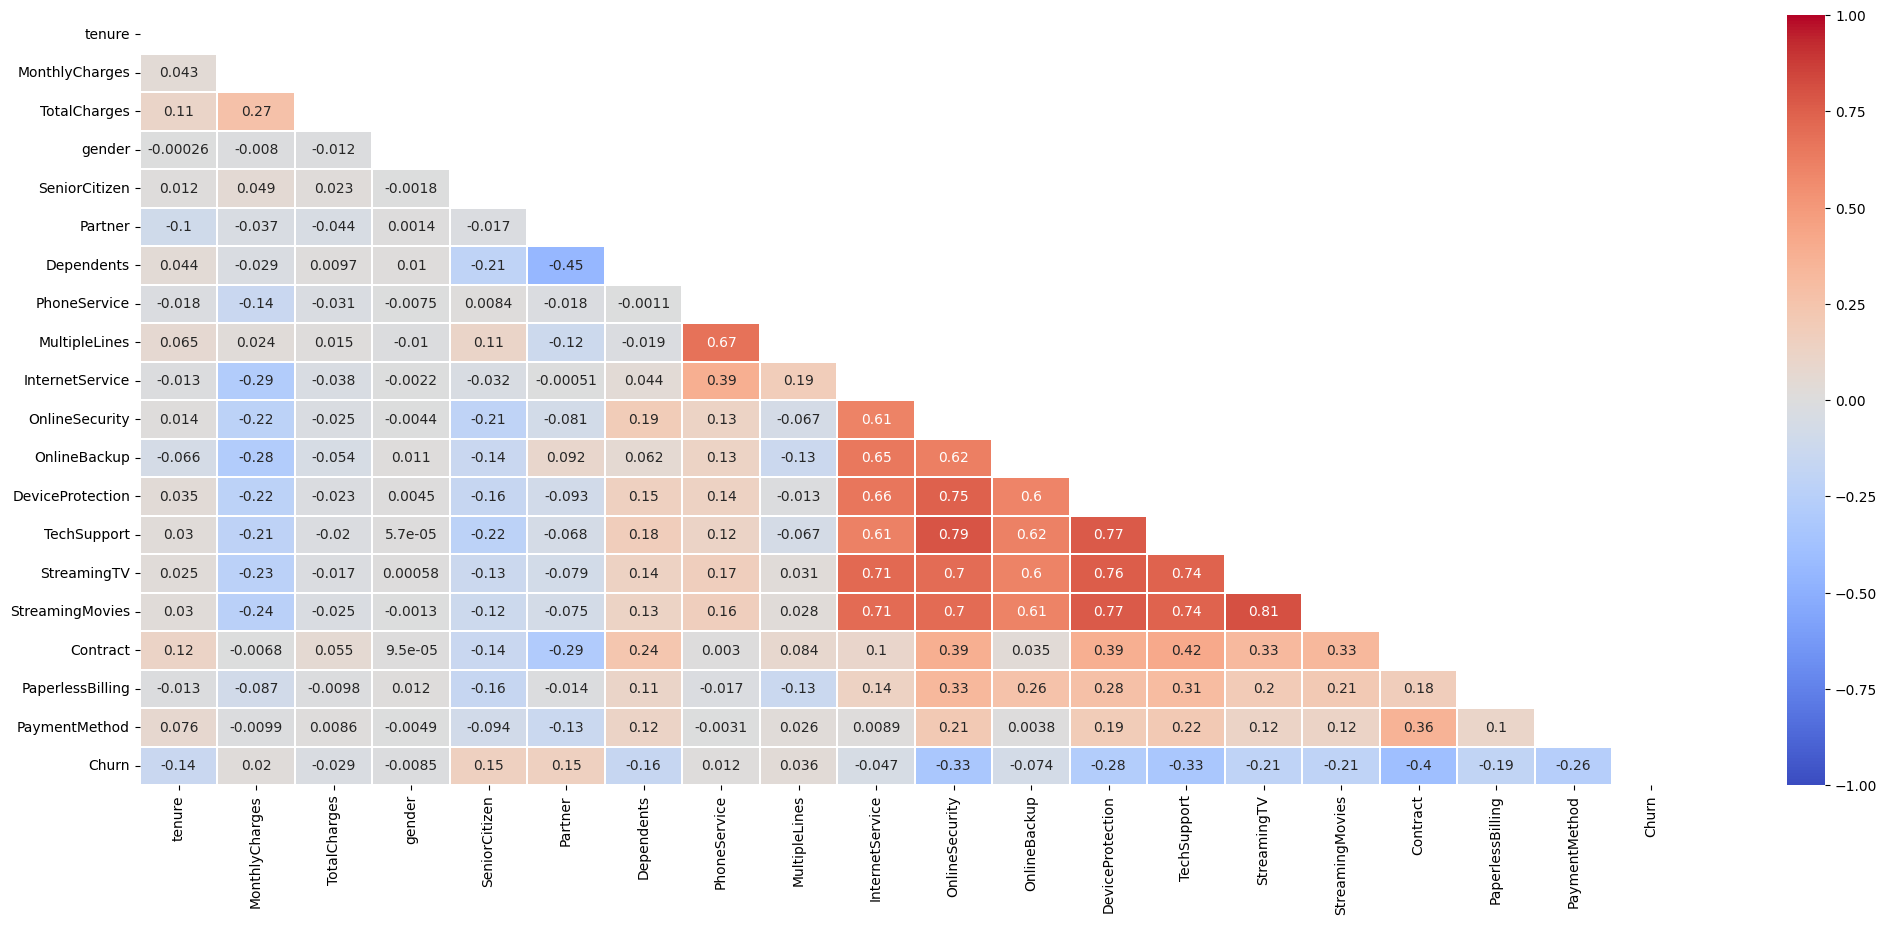

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)